In [1]:
%matplotlib notebook 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

/Users/rjkyng/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
toycomplaint = pd.read_csv("data/toy.complaint_data.csv")

In [5]:
toycomplaint

,crid,incident_date,beat_2012_geocoded,complaintcategory,finalfinding,officer_id
0,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,1
1,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,2
2,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,3
3,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,4
4,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,5
5,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,6
6,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,7
7,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,8
8,1022845,02-Jan-2009 20:30,524,"05B-ARRESTEE - AFTER ARREST, PRIOR TO LOCKUP",UN,9
9,1022845,02-Jan-2009 20:30,524,"05B-ARRESTEE - AFTER ARREST, PRIOR TO LOCKUP",UN,10


In [6]:
toycomplaint.shape

(13840, 6)

In [7]:
toycomplaint.head()

,crid,incident_date,beat_2012_geocoded,complaintcategory,finalfinding,officer_id
0,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,1
1,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,2
2,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,3
3,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,4
4,1022797,01-Jan-2009 0:08,NaN,03G-MISCELLANEOUS,EX,5


In [8]:
toyofficer = pd.read_csv("data/toy.officer_data.csv")

In [9]:
toyofficer.officer_id.unique().shape

(3884,)

In [10]:
toyofficer.officer_id.shape

(3884,)

That's the number of officers that we have in the toy data set?

In [11]:
toids = toyofficer.officer_id

In [12]:
toids_complaints = {}
for oid in toids:
    toids_complaints[oid] = 0

for index, c in toycomplaint.iterrows():
    toids_complaints[c.officer_id] += 1
toids_complaints

{1: 1,
 2: 3,
 3: 11,
 4: 4,
 5: 2,
 6: 15,
 7: 10,
 8: 3,
 9: 20,
 10: 6,
 11: 4,
 12: 1,
 13: 1,
 14: 1,
 15: 9,
 16: 3,
 17: 4,
 18: 7,
 19: 5,
 20: 1,
 21: 8,
 22: 2,
 23: 1,
 24: 3,
 25: 6,
 26: 1,
 27: 7,
 28: 1,
 29: 1,
 30: 2,
 31: 3,
 32: 4,
 33: 4,
 34: 4,
 35: 12,
 36: 3,
 37: 3,
 38: 3,
 39: 4,
 40: 1,
 41: 3,
 42: 19,
 43: 4,
 44: 18,
 45: 14,
 46: 10,
 47: 39,
 48: 19,
 49: 6,
 50: 15,
 51: 35,
 52: 25,
 53: 23,
 54: 16,
 55: 1,
 56: 7,
 57: 1,
 58: 3,
 59: 1,
 60: 2,
 61: 1,
 62: 6,
 63: 17,
 64: 14,
 65: 21,
 66: 11,
 67: 1,
 68: 4,
 69: 16,
 70: 3,
 71: 19,
 72: 6,
 73: 13,
 74: 4,
 75: 6,
 76: 10,
 77: 3,
 78: 6,
 79: 6,
 80: 11,
 81: 11,
 82: 2,
 83: 16,
 84: 15,
 85: 5,
 86: 5,
 87: 3,
 88: 6,
 89: 3,
 90: 4,
 91: 2,
 92: 3,
 93: 3,
 94: 10,
 95: 2,
 96: 5,
 97: 39,
 98: 16,
 99: 9,
 100: 21,
 101: 1,
 102: 12,
 103: 3,
 104: 17,
 105: 1,
 106: 3,
 107: 2,
 108: 2,
 109: 1,
 110: 1,
 111: 12,
 112: 1,
 113: 3,
 114: 5,
 115: 1,
 116: 2,
 117: 1,
 118: 19,
 119: 1,
 

In [13]:
toycomplaint.groupby('officer_id').count()

,crid,incident_date,beat_2012_geocoded,complaintcategory,finalfinding
officer_id,,,,,
1,1,1,0,1,1
2,3,3,1,3,3
3,11,11,4,11,11
4,4,4,1,4,3
5,2,2,1,2,2
6,15,15,9,14,13
7,10,10,8,8,7
8,3,3,2,3,3
9,20,20,14,20,19


In [14]:
officer_complaint_counts = toycomplaint.officer_id.value_counts()

In [23]:
officer_complaint_counts[4], 

(4,)

In [32]:
officer_complaint_counts.shape

(3884,)

In [33]:
socc = sorted(officer_complaint_counts)

In [40]:
%matplotlib inline

(array([  1.78700000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   6.46000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.45000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.18000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.44000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.07000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.09000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

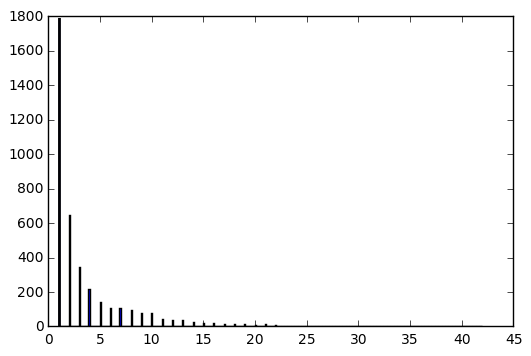

In [44]:
plt.hist(socc,300)